# *Segmentação de Imagens*

## *Importando OpenCV, NumPy e MatPlotlib*

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## *Transformações de Pixels e Segmentação*

### *Carregando a Imagem em Escala de Cinza*

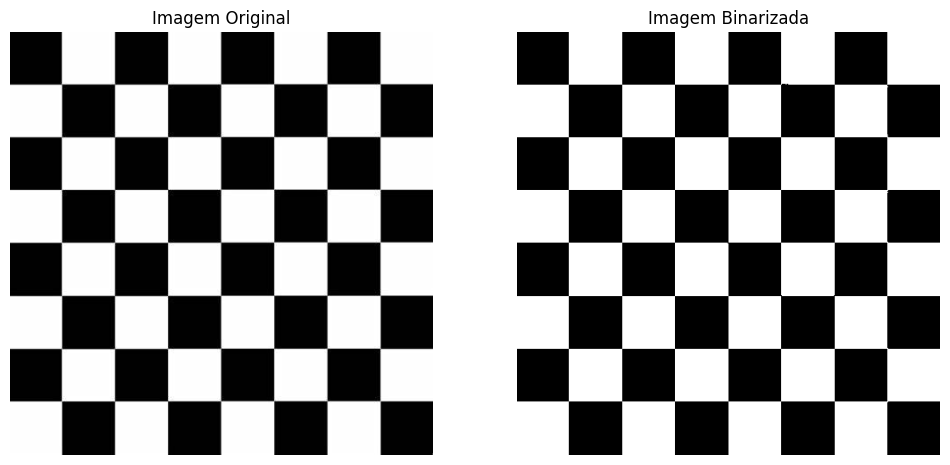

In [2]:
# Carrega a imagem
image = cv2.imread('xadrez.jpeg', cv2.IMREAD_GRAYSCALE)

# Verifica se a imagem foi carregada corretamente
if image is None:
    raise ValueError("Erro ao carregar a imagem. Verifique o caminho e a extensão do arquivo.")

# Aplica a limiarização
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Exibe as imagens usando matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.axis('off')

plt.show()

# *Histograma e Segmentação*

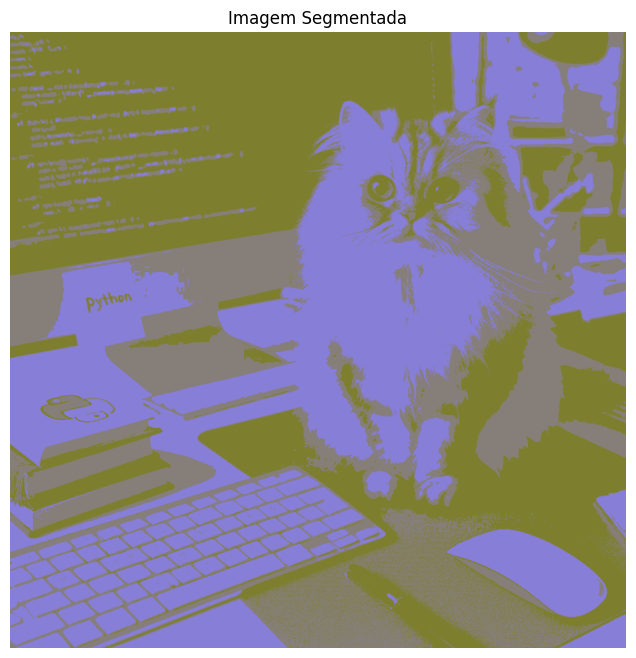

In [3]:
# Carrega a imagem
image = cv2.imread('imagem3_vc.jpeg')

# Verifica se a imagem foi carregada corretamente
if image is None:
    raise ValueError("Erro ao carregar a imagem. Verifique o caminho e a extensão do arquivo.")

# Converte a imagem para o espaço de cores L*a*b
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Redimensiona a imagem para 2D
pixel_values = lab_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define critérios e aplica k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Converte centros de volta para 8 bits e mapeia os labels
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Exibe a imagem segmentada usando matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Imagem Segmentada')
plt.axis('off')
plt.show()
